---
<strong>
    <h1 align='center'>Decorrelating your data and dimension reduction</h1>
</strong>

---


>**Dimension reduction summarizes a dataset using its common occuring patterns.**

In this Notebook, we'll learn about the most fundamental of dimension reduction techniques, "**Principal Component Analysis(PCA)**. PCA is ***often used before supervised learning to improve model performance and generalization***. It can also be useful for unsupervised learning. For example, we'll employ a variant of PCA will allow you **to cluster Wikipedia articles by their content!**

In [1]:
! git clone https://github.com/mohd-faizy/CAREER-TRACK-Data-Scientist-with-Python.git -q

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

plt.style.use('ggplot')
#sns.set_theme(style='whitegrid')
%matplotlib inline

In [3]:
os.chdir('/content/CAREER-TRACK-Data-Scientist-with-Python/24_Unsupervised_Learning_in_Python/_dataset')
cwd = os.getcwd()
print('Curent working directory is ', cwd)

Curent working directory is  /content/CAREER-TRACK-Data-Scientist-with-Python/24_Unsupervised_Learning_in_Python/_dataset


In [4]:
ls

 company-stock-movements-2010-2015-incl.csv  'Musical artists'/
 eurovision-2016.csv                          new_points.csv
 fish.csv                                     points.csv
 Grains/                                     'Wikipedia articles'/
 lcd-digits.csv                               wine.csv


## Visualizing the PCA transformation
- Dimension reduction
    - More efficient storage and computation
    - Remove less-informative "noise" features, which cause problems for prediction tasks, e.g. classification, regression.
- Principal Component Analysis (PCA)
    - Fundamental dimension reduction technique
        - "Decorrelation"
        - Reduce dimension
- PCA aligns data with axes
    - Rotates data samples to be aligned with axes
    - Shifts data samples so they have mean 0
    - No information is lost
- PCA features
    - Rows : samples
    - Columns : PCA features
    - Row gives PCA feature values of corresponding sample
- Pearson Correlation
    - Measures linear correlation of features
    - Value between -1 and 1
    - Value of 0 means no linear correlation
- Principal components
    - directions of variance
    - PCA aligns principal components with the axes

### Correlated data in nature
You are given an array ```grains``` giving the width and length of samples of grain. You suspect that width and length will be correlated. To confirm this, make a scatter plot of width vs length and measure their Pearson correlation.

#### Preprocess

In [5]:
df = pd.read_csv('Grains/seeds-width-vs-length.csv', header=None)
df.head()

,0,1
0,3.312,5.763
1,3.333,5.554
2,3.337,5.291
3,3.379,5.324
4,3.562,5.658


In [6]:
grains = df.values

0.8604149377143469


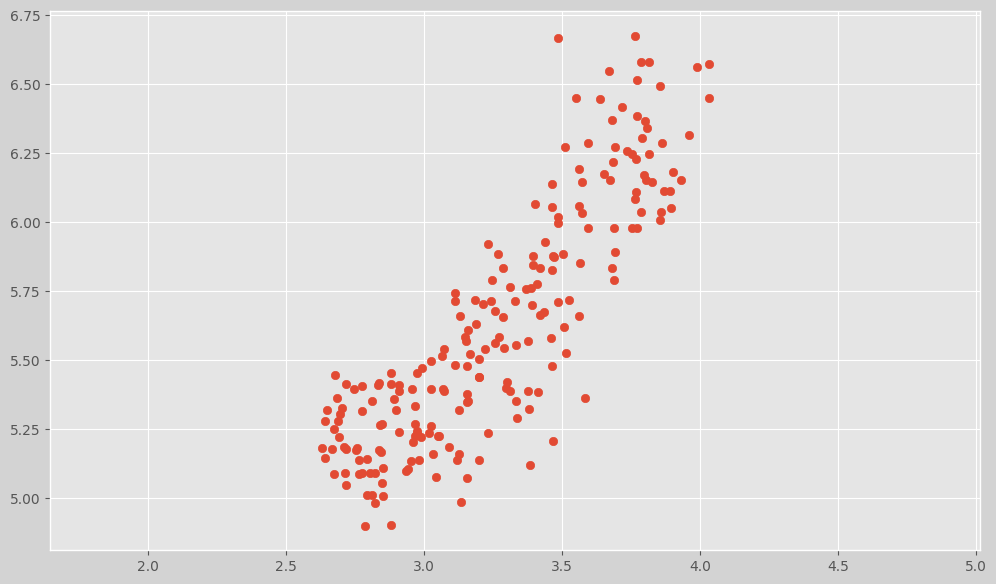

In [7]:
from scipy.stats import pearsonr

# Assign the 0th column of grains: width
width = grains[:, 0]

# Assign the 1st column of grains: length
length = grains[:, 1]

# Scatter plot width vs length
plt.figure(figsize=(12, 7), facecolor='lightgrey')
plt.scatter(width, length)
plt.axis('equal');

# Calculate the Pearson correlation
correlation, pvalue = pearsonr(width, length)

# Display the correlation
print(correlation)

### Decorrelating the grain measurements with PCA
You observed in the previous exercise that the width and length measurements of the grain are correlated. Now, you'll use PCA to decorrelate these measurements, then plot the decorrelated points and measure their Pearson correlation.



8.933825901280557e-17


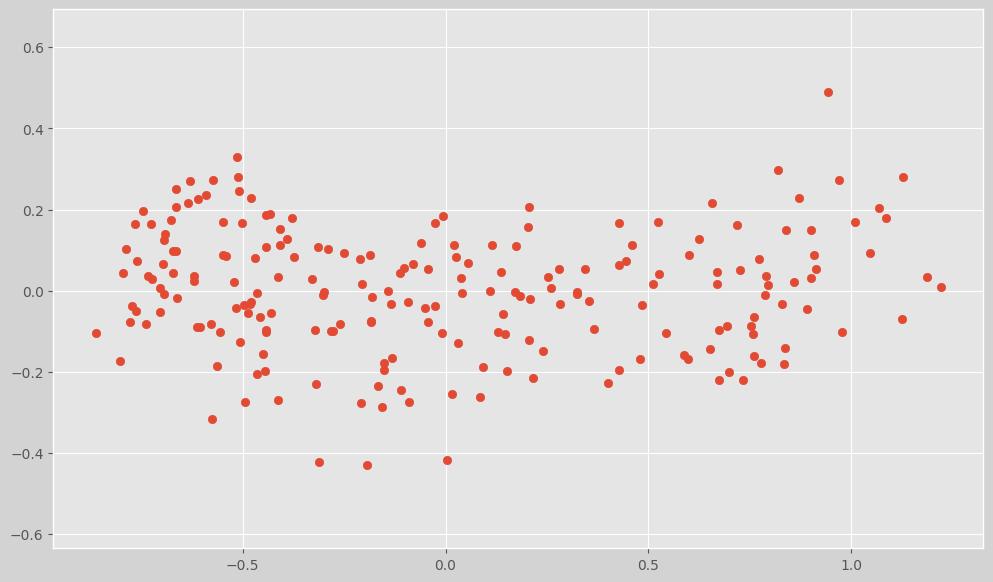

In [8]:
from sklearn.decomposition import PCA

# Create a PCA instance: model
model = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(grains)

# Assign 0th column of pca_features: xs
xs = pca_features[:, 0]

# Assign 1st column of pca_features: ys
ys = pca_features[:, 1]

# Scatter plot xs vs ys
plt.figure(figsize=(12, 7), facecolor='lightgrey')
plt.scatter(xs, ys)
plt.axis('equal');

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(correlation)

## Intrinsic dimension
- Intrinsic dimension
    - Intrinsic dimension = number of features needed to approximate the dataset
    - Essential idea behind dimension reduction
    - What is the most compact representation of the samples?
    - Can be detected with PCA
- PCA identifies intrinsic dimension
    - Scatter plots work only if samples have 2 or 3 features
    - PCA identifies intrinsic dimension when samples have any number of features
    - Intrinsic dimension = **number of PCA features with signficant variance**

### The first principal component
The first principal component of the data is the direction in which the data varies the most. In this exercise, your job is to use PCA to find the first principal component of the length and width measurements of the grain samples, and represent it as an arrow on the scatter plot.

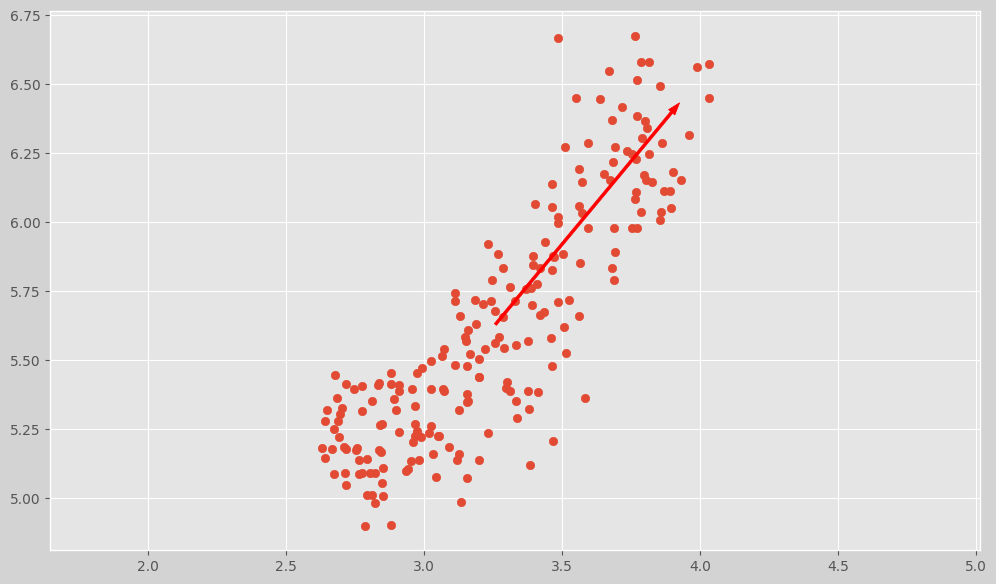

In [9]:
# Plot size
plt.figure(figsize=(12, 7), facecolor='lightgrey')

# Make a scatter plot of the untransformed points
plt.scatter(grains[:, 0], grains[:, 1])

# Create a PCA instance: model
model = PCA()

# Fit model to points
model.fit(grains)

# Get the mean of the grain samples: mean
mean = model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0, :]

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

# keep axes on same scale
plt.axis('equal');
plt.show()
#plt.savefig('/content/pca-arrow.png')

### Variance of the PCA features
The fish dataset is 6-dimensional. But what is its intrinsic dimension? Make a plot of the variances of the PCA features to find out. As before, ```samples``` is a 2D array, where each row represents a fish. You'll need to standardize the features first.

#### Preprocess

In [10]:
df = pd.read_csv('fish.csv', header=None)
df.head()

,0,1,2,3,4,5,6
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1
3,Bream,363.0,26.3,29.0,33.5,38.0,13.3
4,Bream,430.0,26.5,29.0,34.0,36.6,15.1


In [11]:
samples = df.loc[:, 1:].values

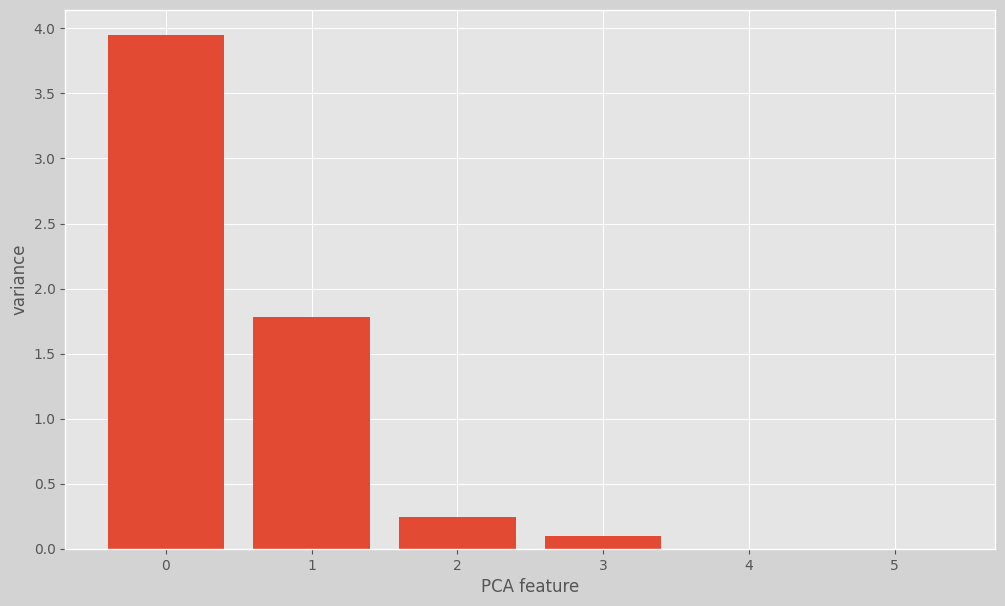

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to 'samples'
pipeline.fit(samples)

# Plot the explained variances
plt.figure(figsize=(12, 7), facecolor='lightgrey')
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features);
plt.show()

## Dimension reduction with PCA
- Dimension reduction
    - Represent same data, using less features
    - Important part of machine-learning pipelines
    - Can be performed using PCA
- Dimension reduction with PCA
    - PCA features are in decreasing order of variance
    - Assumes the low variance features are "noise", and high variance features are informative
    - Specify how many features to keep
    - Intrinsic dimension is a good choice
- Word frequency arrays
    - Rows represent documents, columns represent words
    - Entries measure presence of each word in each document, measure using "tf-idf"

### Dimension reduction of the fish measurements
In a previous exercise, you saw that 2 was a reasonable choice for the "intrinsic dimension" of the fish measurements. Now use PCA for dimensionality reduction of the fish measurements, retaining only the 2 most important components.

#### Preprocess

In [13]:
scaler = StandardScaler()
scaled_samples = scaler.fit_transform(samples)

In [14]:
# Create a PCA model with 2 components: pca
pca = PCA(n_components=2)

# Fit the PCA instance to the scaled samples
pca.fit(scaled_samples)

# Transform the scaled samples: pca_features
pca_features = pca.transform(scaled_samples)

# Print the shape of pca_features
print(pca_features.shape)

(85, 2)


### A tf-idf word-frequency array
In this exercise, you'll create a tf-idf word frequency array for a toy collection of documents. For this, use the ```TfidfVectorizer``` from sklearn. It transforms a list of documents into a word frequency array, which it outputs as a csr_matrix. It has ```fit()``` and ```transform()``` methods like other sklearn objects.

In [15]:
documents = ['cats say meow', 'dogs say woof', 'dogs chase cats']

In [17]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer: tfidf
tfidf = TfidfVectorizer()

# Apply fit_transform to document: csr_mat
csr_mat = tfidf.fit_transform(documents)

# Print result of toarray() method
print(csr_mat.toarray())

# Get the words: words
words = tfidf.get_feature_names_out()

# Print words
print(words)


[[0.51785612 0.         0.         0.68091856 0.51785612 0.        ]
 [0.         0.         0.51785612 0.         0.51785612 0.68091856]
 [0.51785612 0.68091856 0.51785612 0.         0.         0.        ]]
['cats' 'chase' 'dogs' 'meow' 'say' 'woof']


### Clustering Wikipedia part I
You saw in the video that ```TruncatedSVD``` is able to perform PCA on sparse arrays in csr_matrix format, such as word-frequency arrays. Combine your knowledge of TruncatedSVD and k-means to cluster some popular pages from Wikipedia. In this exercise, build the pipeline. In the next exercise, you'll apply it to the word-frequency array of some Wikipedia articles.

Create a Pipeline object consisting of a TruncatedSVD followed by KMeans. (This time, we've precomputed the word-frequency matrix for you, so there's no need for a TfidfVectorizer).

The Wikipedia dataset you will be working with was obtained from [here](https://blog.lateral.io/2015/06/the-unknown-perils-of-mining-wikipedia/).

In [18]:
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

# Create a TruncatedSVD instance: svd
svd = TruncatedSVD(n_components=50)

# Create a KMeans instance: kmeans
kmeans = KMeans(n_clusters=6)

# Create a pipeline: pipeline
pipeline = make_pipeline(svd, kmeans)

### Clustering Wikipedia part II
It is now time to put your pipeline from the previous exercise to work! You are given an array articles of tf-idf word-frequencies of some popular Wikipedia articles, and a list titles of their titles. Use your pipeline to cluster the Wikipedia articles.

A solution to the previous exercise has been pre-loaded for you, so a Pipeline pipeline chaining TruncatedSVD with KMeans is available.

#### Preprocess

In [19]:
from scipy.sparse import csc_matrix

documents = pd.read_csv('Wikipedia articles/wikipedia-vectors.csv', index_col=0)
titles = documents.columns
articles = csc_matrix(documents.values).T

In [20]:
type(articles)

scipy.sparse._csr.csr_matrix

In [21]:
articles.T.shape

(13125, 60)

In [22]:
# Fit the pipeline to articles
pipeline.fit(articles)

# Calculate the cluster labels: labels
labels = pipeline.predict(articles)

# Create a DataFrame aligning labels and titles: df
df = pd.DataFrame({'label': labels, 'article': titles})

# Display df sorted by cluster label
print(df.sort_values('label'))

    label                                        article
14      0                                 Climate change
19      0  2007 United Nations Climate Change Conference
18      0  2010 United Nations Climate Change Conference
17      0  Greenhouse gas emissions by the United States
16      0                                        350.org
15      0                                 Kyoto Protocol
13      0                               Connie Hedegaard
12      0                                   Nigel Lawson
11      0       Nationally Appropriate Mitigation Action
10      0                                 Global warming
59      1                                    Adam Levine
50      1                                   Chad Kroeger
57      1                          Red Hot Chili Peppers
56      1                                       Skrillex
55      1                                  Black Sabbath
54      1                                 Arctic Monkeys
58      1                      

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


#### $\color{skyblue}{\textbf{Connect with me:}}$


[<img align="left" src="https://cdn4.iconfinder.com/data/icons/social-media-icons-the-circle-set/48/twitter_circle-512.png" width="32px"/>][twitter]
[<img align="left" src="https://cdn-icons-png.flaticon.com/512/145/145807.png" width="32px"/>][linkedin]
[<img align="left" src="https://cdn2.iconfinder.com/data/icons/whcompare-blue-green-web-hosting-1/425/cdn-512.png" width="32px"/>][Portfolio]

[twitter]: https://twitter.com/F4izy
[linkedin]: https://www.linkedin.com/in/mohd-faizy/
[Portfolio]: https://mohdfaizy.com/
